Bayesian Structured Time Series - BSTS
Installation of pyflux took a bit of work - dependencies include 
pandas, numpy, scipy and others
then had to go on github to download pyflux code and manually install

https://pyflux.readthedocs.io/en/latest/getting_started.html

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
a = DataReader('JPM',  'yahoo', datetime(2006,6,1), datetime(2016,6,1))
a_returns = pd.DataFrame(np.diff(np.log(a['Adj Close'].values)))
a_returns.index = a.index.values[1:a.index.values.shape[0]]
a_returns.columns = ["JPM Returns"]

a_returns.head()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [4]:
import matplotlib.pyplot as plt

NameError: name 'a_returns' is not defined

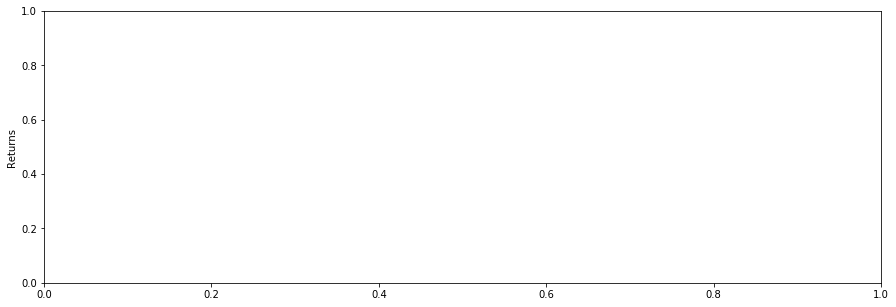

In [5]:
plt.figure(figsize=(15, 5))
plt.ylabel("Returns")
plt.plot(a_returns)
plt.show()

In [6]:
import pyflux as pf

In [7]:
pf.acf_plot(a_returns.values.T[0])
pf.acf_plot(np.square(a_returns.values.T[0]))

AttributeError: module 'pyflux' has no attribute 'acf_plot'

In [16]:
my_model = pf.GARCH(p=1, q=1, data=a_returns)
print(my_model.latent_variables)

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


In [17]:
my_model.adjust_prior(1, pf.TruncatedNormal(0.01, 0.5, lower=0.0, upper=1.0))
my_model.adjust_prior(2, pf.TruncatedNormal(0.97, 0.5, lower=0.0, upper=1.0))

In [18]:
result = my_model.fit('M-H', nsims=20000)

Acceptance rate of Metropolis-Hastings is 0.05
Acceptance rate of Metropolis-Hastings is 0.48455
Acceptance rate of Metropolis-Hastings is 0.37965

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.3755


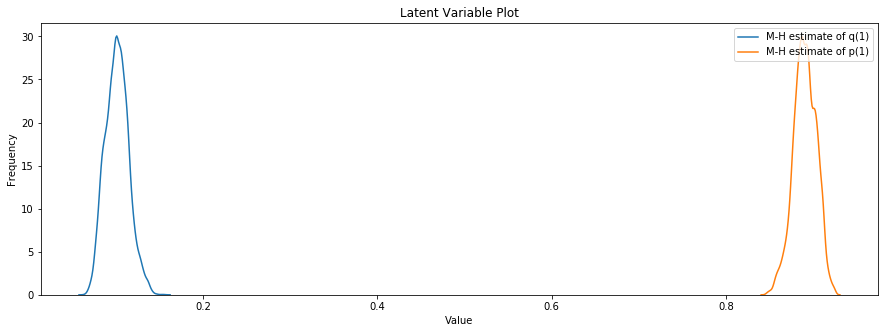

In [19]:
my_model.plot_z([1,2])